<div style="
  background: #cc0000;
  color: white;
  font-weight: 900;
  font-size: 44px;
  text-align: center;
  padding: 30px;
  border-radius: 10px;
  font-family: 'Segoe UI', Arial, sans-serif;
  box-shadow: 0 6px 18px rgba(0,0,0,0.4);
  letter-spacing: 1px;
">
  Diabetes Management Using Reinforcement Learning (RL) 
</div>


1. import  liabariries

In [1]:
# Diabetes Management using Reinforcement Learning (RL)
import numpy as np
import random
import matplotlib.pyplot as plt


2. Environment Class

In [2]:
# Step1: Define the Patient Environment
class DiabetesEnv:
    def __init__(self, initial_glucose=120, safe_range=(70,180)):
        self.glucose = initial_glucose
        self.safe_range = safe_range

    def reset(self):
        """Reset glucose to initial value."""
        self.glucose = 120
        return self.glucose

    def step(self, action, carbs=50, exercise=0):
        """
        Update glucose based on action and environment factors.
        - action: 'increase', 'decrease', 'keep'
        - carbs: carbohydrate intake
        - exercise: exercise intensity
        Returns: glucose, reward, done
        """
        if action == "increase":
            self.glucose -= 10
        elif action == "decrease":
            self.glucose += 5

        self.glucose += carbs * 0.1      # carbs effect
        self.glucose -= exercise * 0.5   # exercise effect
        self.glucose += np.random.normal(0,2)  # random noise
        self.glucose = max(30, self.glucose)   # min glucose 30

        reward = self.get_reward()
        done = False
        return self.glucose, reward, done

    def get_reward(self):
        """Reward +1 if glucose in safe range, else -1"""
        if self.safe_range[0] <= self.glucose <= self.safe_range[1]:
            return 1
        else:
            return -1


3. RL Agent Class

In [3]:
# Step2: Define Q-Learning Agent
class QLearningAgent:
    def __init__(self, states, actions, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.states = states
        self.actions = actions
        self.Q = {s: {a:0 for a in actions} for s in states}
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if random.uniform(0,1) < self.epsilon:
            return random.choice(self.actions)
        else:
            return max(self.Q[state], key=self.Q[state].get)

    def update(self, state, action, reward, next_state):
        """Q-Learning update rule"""
        self.Q[state][action] += self.alpha * (
            reward + self.gamma * max(self.Q[next_state].values()) - self.Q[state][action]
        )


4. Training Function

In [4]:
# Step3: Training Function
def train_agent(env, agent, episodes=500, time_steps=20):
    history = []
    for ep in range(episodes):
        glucose = env.reset()
        for t in range(time_steps):
            state = min(agent.states, key=lambda x: abs(x - glucose))
            action = agent.choose_action(state)
            glucose, reward, done = env.step(action)
            next_state = min(agent.states, key=lambda x: abs(x - glucose))
            agent.update(state, action, reward, next_state)
        history.append(glucose)
    return history


5. Evaluation / Test Function

In [5]:
# Step4: Test Learned Policy
def test_agent(env, agent, time_steps=20):
    glucose = env.reset()
    test_glucose = []
    for t in range(time_steps):
        state = min(agent.states, key=lambda x: abs(x - glucose))
        action = max(agent.Q[state], key=agent.Q[state].get)
        glucose, reward, done = env.step(action)
        test_glucose.append(glucose)
    return test_glucose


6. Plotting Function

In [6]:
# Step5: Professional Plotting Function
def plot_glucose(history, safe_range, title="Glucose Levels"):
    plt.figure(figsize=(12,6))
    plt.plot(history, marker='o', linestyle='-', color='blue', label='Glucose Level')
    plt.axhline(y=safe_range[0], color='red', linestyle='--', label='Safe Range Min')
    plt.axhline(y=safe_range[1], color='green', linestyle='--', label='Safe Range Max')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Episode / Time Step", fontsize=12)
    plt.ylabel("Glucose (mg/dL)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.show()


7. Setup Environment, Agent & Train

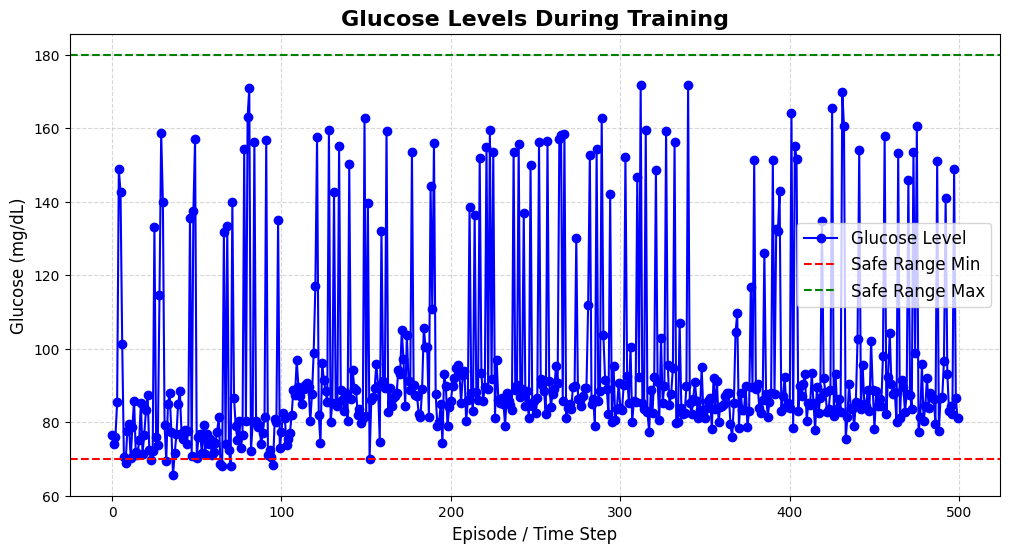

In [7]:
#Step 6: Setup Environment & Agent
states = np.arange(50,301,10)
actions = ["increase","decrease","keep"]

env = DiabetesEnv()
agent = QLearningAgent(states, actions, alpha=0.1, gamma=0.9, epsilon=0.2)

#Train Agent
history = train_agent(env, agent, episodes=500, time_steps=20)
plot_glucose(history, env.safe_range, title="Glucose Levels During Training")


8. Test Learned Policy

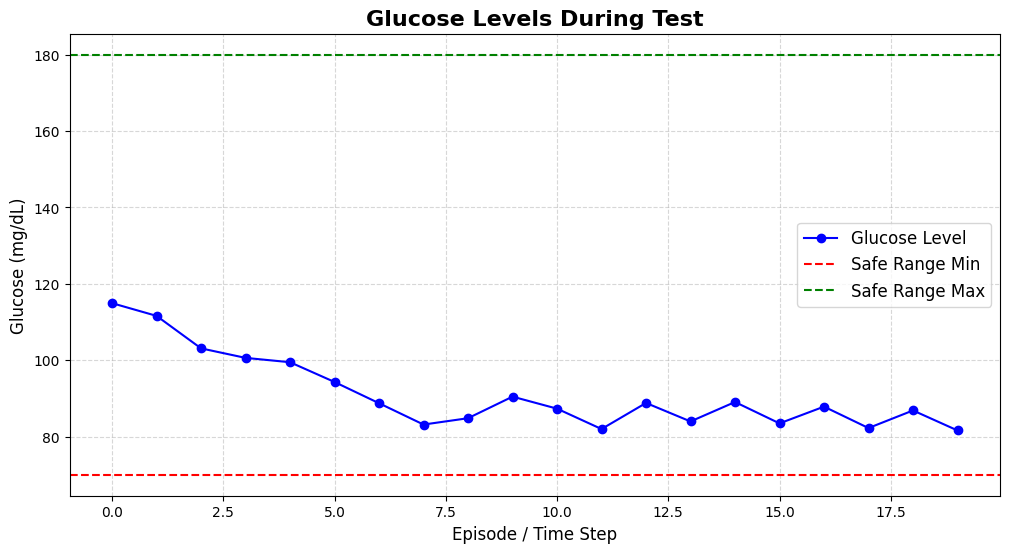

In [8]:
#Step 7: Test Agent
test_glucose = test_agent(env, agent, time_steps=20)
plot_glucose(test_glucose, env.safe_range, title="Glucose Levels During Test")
